In [1]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

save_path="../data/models/"
model_name="first_try.h5"

# dimensions of our images.
img_width, img_height = 32, 32

train_data_dir = '../data/train'
validation_data_dir = '../data/test'
nb_train_samples = 100
nb_validation_samples = 40
epochs = 200
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (1, img_width, img_height)
else:
    input_shape = (img_width, img_height, 1)

model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

Using TensorFlow backend.


In [2]:
model.add(Flatten())
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [3]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
#         rescale=1./255,
        rotation_range=15,
        shear_range=0.2,
        width_shift_range=0.05,
        height_shift_range=0.05,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest',
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator()#escale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode="grayscale",
    save_to_dir="../data/save/",
    save_prefix='test',
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode='binary')

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save_weights(str(save_path+model_name))

Found 292 images belonging to 2 classes.
Found 412 images belonging to 2 classes.
Epoch 1/200
6/6 [==============================] - 0s 74ms/step - loss: 5.2907 - accuracy: 0.5595 - val_loss: 0.0661 - val_accuracy: 0.9375
Epoch 2/200
6/6 [==============================] - 0s 20ms/step - loss: 1.4380 - accuracy: 0.6979 - val_loss: 0.2898 - val_accuracy: 0.9375
Epoch 3/200
6/6 [==============================] - 0s 47ms/step - loss: 0.7507 - accuracy: 0.6771 - val_loss: 1.6406 - val_accuracy: 0.5312
Epoch 4/200
6/6 [==============================] - 0s 56ms/step - loss: 0.6926 - accuracy: 0.7188 - val_loss: 0.6240 - val_accuracy: 0.8750
Epoch 5/200
6/6 [==============================] - 0s 46ms/step - loss: 0.7632 - accuracy: 0.6771 - val_loss: 0.5328 - val_accuracy: 0.6562
Epoch 6/200
6/6 [==============================] - 0s 44ms/step - loss: 0.6939 - accuracy: 0.6562 - val_loss: 0.3764 - val_accuracy: 0.8438
Epoch 7/200
6/6 [==============================] - 0s 47ms/step - loss: 0.5297

6/6 [==============================] - 0s 59ms/step - loss: 0.2858 - accuracy: 0.8958 - val_loss: 0.2414 - val_accuracy: 0.8438
Epoch 59/200
6/6 [==============================] - 0s 39ms/step - loss: 0.5409 - accuracy: 0.8452 - val_loss: 0.4794 - val_accuracy: 0.9062
Epoch 60/200
6/6 [==============================] - 0s 44ms/step - loss: 0.2602 - accuracy: 0.8854 - val_loss: 0.2383 - val_accuracy: 0.9375
Epoch 61/200
6/6 [==============================] - 0s 51ms/step - loss: 0.3692 - accuracy: 0.8438 - val_loss: 0.8538 - val_accuracy: 0.8125
Epoch 62/200
6/6 [==============================] - 0s 45ms/step - loss: 0.2797 - accuracy: 0.8750 - val_loss: 0.6875 - val_accuracy: 0.8438
Epoch 63/200
6/6 [==============================] - 0s 53ms/step - loss: 0.3200 - accuracy: 0.8929 - val_loss: 0.6901 - val_accuracy: 0.9375
Epoch 64/200
6/6 [==============================] - 0s 56ms/step - loss: 0.2105 - accuracy: 0.9375 - val_loss: 0.6114 - val_accuracy: 0.9062
Epoch 65/200
6/6 [========

6/6 [==============================] - 0s 43ms/step - loss: 0.3889 - accuracy: 0.8542 - val_loss: 0.6632 - val_accuracy: 0.9375
Epoch 117/200
6/6 [==============================] - 0s 44ms/step - loss: 0.3886 - accuracy: 0.8854 - val_loss: 0.2866 - val_accuracy: 0.8929
Epoch 118/200
6/6 [==============================] - 0s 50ms/step - loss: 0.2445 - accuracy: 0.9271 - val_loss: 0.3682 - val_accuracy: 0.8438
Epoch 119/200
6/6 [==============================] - 0s 47ms/step - loss: 0.1088 - accuracy: 0.9479 - val_loss: 0.2809 - val_accuracy: 0.8750
Epoch 120/200
6/6 [==============================] - 0s 41ms/step - loss: 0.1386 - accuracy: 0.9286 - val_loss: 0.0873 - val_accuracy: 0.9375
Epoch 121/200
6/6 [==============================] - 0s 46ms/step - loss: 0.3569 - accuracy: 0.8854 - val_loss: 0.3743 - val_accuracy: 0.8438
Epoch 122/200
6/6 [==============================] - 0s 38ms/step - loss: 0.3116 - accuracy: 0.8810 - val_loss: 0.2014 - val_accuracy: 1.0000
Epoch 123/200
6/6 [=

Epoch 174/200
6/6 [==============================] - 0s 48ms/step - loss: 0.1714 - accuracy: 0.9286 - val_loss: 0.6565 - val_accuracy: 0.9375
Epoch 175/200
6/6 [==============================] - 0s 63ms/step - loss: 0.3210 - accuracy: 0.9167 - val_loss: 0.4558 - val_accuracy: 0.8125
Epoch 176/200
6/6 [==============================] - 0s 49ms/step - loss: 0.1375 - accuracy: 0.9762 - val_loss: 1.3506 - val_accuracy: 0.8438
Epoch 177/200
6/6 [==============================] - 0s 62ms/step - loss: 0.2646 - accuracy: 0.9167 - val_loss: 0.2751 - val_accuracy: 0.8750
Epoch 178/200
6/6 [==============================] - 0s 69ms/step - loss: 0.1370 - accuracy: 0.9583 - val_loss: 2.3294 - val_accuracy: 0.9375
Epoch 179/200
6/6 [==============================] - 0s 55ms/step - loss: 0.1441 - accuracy: 0.9271 - val_loss: 0.7888 - val_accuracy: 0.8125
Epoch 180/200
6/6 [==============================] - 0s 63ms/step - loss: 0.3759 - accuracy: 0.8750 - val_loss: 0.2770 - val_accuracy: 0.9375
Epoch 

In [15]:
pop='../data/test/populated/IMG_0237_square_44.png'
unpop='../data/test/unpopulated/IMG_0246_square_33.png'
grey='../data/save/test_9_4058204.png'

In [5]:
img=load_img(pop)

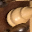

In [6]:
img

In [18]:
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
print(x.shape)

(32, 32, 3)


In [8]:
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
print(x.shape)

(1, 32, 32, 3)


In [9]:
import numpy as np

In [10]:
def rgb_to_gray(image_array,bgr=False):
    if bgr: return np.array([[0.21*image_array[i][j][2] + 0.72*image_array[i][j][1] + 0.07*image_array[i][j][0] for j in range(image_array.shape[1])]
                            for i in range(image_array.shape[0])])
    return np.array([[0.21*image_array[i][j][0] + 0.72*image_array[i][j][1] + 0.07*image_array[i][j][2] for j in range(image_array.shape[1])]
                            for i in range(image_array.shape[0])])

In [19]:
y=rgb_to_gray(x)

In [22]:
yg=array_to_img(y.reshape(y.shape+(1,)))

In [24]:
yga=img_to_array(yg)

In [35]:
yga.shape

(32, 32, 1)

In [46]:
model.predict_proba(yga.reshape(1,32,32,1))

array([[3.606227e-10]], dtype=float32)

In [27]:
lg=load_img(grey)

In [29]:
lga=img_to_array(lg)

In [30]:
lga.shape

(32, 32, 3)

In [31]:
lga

array([[[182., 182., 182.],
        [183., 183., 183.],
        [180., 180., 180.],
        ...,
        [ 35.,  35.,  35.],
        [ 33.,  33.,  33.],
        [ 30.,  30.,  30.]],

       [[181., 181., 181.],
        [184., 184., 184.],
        [182., 182., 182.],
        ...,
        [ 25.,  25.,  25.],
        [ 23.,  23.,  23.],
        [ 22.,  22.,  22.]],

       [[180., 180., 180.],
        [183., 183., 183.],
        [182., 182., 182.],
        ...,
        [ 27.,  27.,  27.],
        [ 29.,  29.,  29.],
        [ 32.,  32.,  32.]],

       ...,

       [[ 70.,  70.,  70.],
        [ 61.,  61.,  61.],
        [ 54.,  54.,  54.],
        ...,
        [ 39.,  39.,  39.],
        [ 50.,  50.,  50.],
        [ 47.,  47.,  47.]],

       [[ 76.,  76.,  76.],
        [ 65.,  65.,  65.],
        [ 55.,  55.,  55.],
        ...,
        [ 34.,  34.,  34.],
        [ 49.,  49.,  49.],
        [ 54.,  54.,  54.]],

       [[ 74.,  74.,  74.],
        [ 74.,  74.,  74.],
        [ 59.,  

In [ ]:
x